# Ordinary Differential Equations

This notebook includes some exercises to calculate solutions to ordinary differential equations both numerically and symbolically in Python. Prepared for EAS Practical Coding and Math course at Georgia Tech.

In [60]:
import numpy as np
import matplotlib.pyplot as plt
from sympy import *
from scipy.integrate import solve_ivp, solve_bvp

## Numerical solution to ODEs - Initial Value Problem

First lets define a weird ODE $$\frac{dy}{dt} = y(t) \sin(t^2)$$ which doesn't have an obvious solution. If we want to specify the initial value problem (IVP), we need to specify an "initial condition", one value of y(t): $$ y(t=0) = 1$$ Otherwise, any solution would have integration constants.

Lets start by defining the right hand side of this ODE as a function RHS (using an anonymous lambda function)

In [67]:
RHS = lambda t, y: y*np.sin(t**2)  #define RHS

solve_ivp is a scipy function that numerically calculates an "initial value problem" (an ODE with an initial condition). The first input is the function defining the right hand side of the ODE, the second input is the range (in t here) over which the solution should be calculated, the third input is the initial condition, the fourth input are the places (in t) where a solution should be output

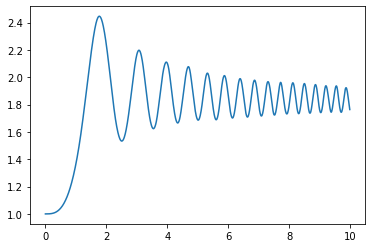

In [71]:
sol = solve_ivp(RHS, [0, 10], [1], t_eval=np.arange(0, 10, 0.01)) #second entry is range of integration, third entry is initial condition
plt.plot(sol.t, sol.y[0])

## Symbolic Solutions to ODE IVPs

To use SymPy, you first must define which variables are "symbols"

In [72]:
from sympy import Function, dsolve, Eq, Derivative, sin, cos, symbols
from sympy.abc import t
y = Function('y')
Eq = Derivative(y(t), t) - y(t)*sin(t**2)
Eq

-y(t)*sin(t**2) + Derivative(y(t), t)

Then you can write functions as you would with numerical values in Python

In [74]:
ysol = dsolve(Eq, y(t),ics={y(0): 1})
ysol

Eq(y(t), exp(sqrt(2)*sqrt(pi)*fresnels(sqrt(2)*t/sqrt(pi))/2))

And use the plotting functionality in SymPy

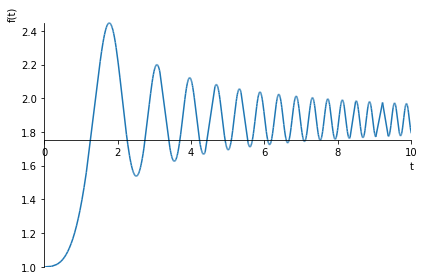

In [75]:
from sympy.plotting import plot
plot(ysol.rhs,xlim=(0,10),ylim=(1,2.5))

## Boundary Value Problems

Another type of ODE problem is a "Boundary Value Problem" (technically an IVP is a type of BVP with only one BC) where we have multiple conditions on the solution (boundary conditions) where the function we are solving for has known values at two locations (if problem is in one dimension). BVPs sometimes do not have solutions or do not have unique solutions (as opposed to IVPs which are more likely to have unique solutions). We will use a particularly well behaved BVP as an example: $$ y'' + 4y = 0$$ with boundary conditions $y(0) = -2$ and $y(\pi/4) = 10$.

### Numerical solutions to BVPs

First we need to define the ODE and BCs as functions to be passed to the Python BVP solver. To do so, we need to re-write our problem as a system of first-order ODE's: $$y_1' = y_2$$ $$y_2' = -4y_1$$

In [61]:
def ODEqn(x, y):
    return np.vstack((y[1], -4*y[0]))

In [62]:
def bcs(ya, yb):
    return np.array([ya[0]+2, yb[0]-10])

Next we want to setup the mesh on which we will solve the problem

In [64]:
x = np.linspace(0, np.pi/4, 10)

And an initial "guess" for the solution y(x)

In [65]:
y_guess = np.zeros((2, x.size))
y_guess[0] = -2
y_guess[-1] = 10

Then, with the ODE, BCs, x mesh, and initial guess on y as inputs, we can use solve_bvp (from the same package as solve_ivp) to solve this BVP

In [66]:
ysol = solve_bvp(ODEqn, bcs, x, y_guess)

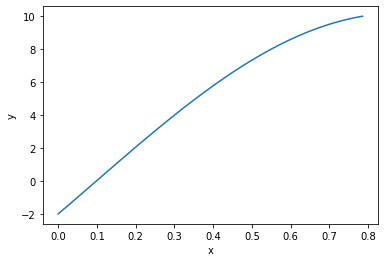

In [70]:
x_plot = np.linspace(0, np.pi/4, 100)
y_plot = ysol.sol(x_plot)[0]
plt.plot(x_plot, y_plot, label='y')
plt.xlabel("x")
plt.ylabel("y")
plt.show()

### Analytic Solution to BVPs

We can solve this problem analytically/symbolically with SymPy in mostly the same way as before, just specifying the second-order ODE directly and specifying two conditions in the ics vector instead of just one. Starting by defining some symbols

In [71]:
f = symbols("f", cls=Function)
x = symbols("x")

Then a system of first order ODEs is defined

In [72]:
eq = f(x).diff(x,2)+4*f(x)

In [74]:
ysol=dsolve(eq, ics={f(0): -2, f(pi/4): 10})
ysol

Eq(f(x), 10*sin(2*x) - 2*cos(2*x))

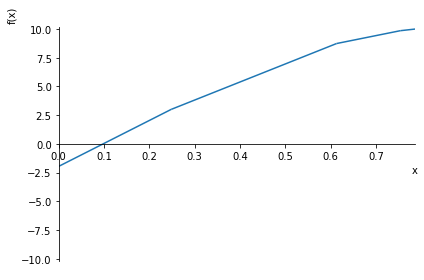

In [76]:
from sympy.plotting import plot
plot(ysol.rhs,xlim=(0,pi/4))